<a href="https://colab.research.google.com/github/Ribeirotmr/Iniciacao-Cientifica/blob/main/C%C3%B3pia_de_Qiskit_VQE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Autoresolvedor Variacional Quântico (Variational Quantum Eigensolver - VQE)
---

VQE:
*   Qiskit: *Variational Quantum Eigensolver | Qiskit Global Summer School 2023*. Youtube, Sep 7, 2023. [https://youtu.be/AhEnvYgoA34?si=n2FwS7S3Hslrvh6Q](https://youtu.be/AhEnvYgoA34?si=n2FwS7S3Hslrvh6Q).
*   Qiskit: *What is an Expectation Value? Quantum Jargon Explained*. Youtube, Jun 14, 2023. [https://youtu.be/8VgBPEcZ_X0?si=HLMSThcH1sR1Fe0r](https://youtu.be/8VgBPEcZ_X0?si=HLMSThcH1sR1Fe0r).
*   Qiskit: *An Introduction to Qiskit Runtime Primitives Version 2 with Chris Wood: Qiskit Summer School 2024*. YOutube, Aug 12, 2024. [https://youtu.be/OuYz02clnx4?si=EVFnzt8-YEtR5sDv](https://youtu.be/OuYz02clnx4?si=EVFnzt8-YEtR5sDv).

*   *Qiskit's Primitives*: [https://docs.quantum.ibm.com/api/qiskit/primitives](https://docs.quantum.ibm.com/api/qiskit/primitives).

*   *Qiskit's Estimator*: [https://docs.quantum.ibm.com/guides/get-started-with-primitives](https://docs.quantum.ibm.com/guides/get-started-with-primitives).

<font color = red>No Qiskit, o cálculo de valores esperados pode ser realizado via *Estimator* ou *Sampler*!!!<font>


# Estratégia geral

Considere um sistema quântico com Hamiltoniano independente do tempo $\frak{H}$.

Suponha que possamos parametrizar o espaço de estados do sistema por uma família de parâmetros $\mathbf{\Theta} = \left(\theta_j\right)$:

$$
\text{família de parâmetros}: \mathbf{\Theta} \mapsto |\psi (\mathbf{\Theta}) \rangle: \text{estado do sistema}.
$$

O *estado fundamental* do sistema é o estado de menor energia, ou o auto-estado associado ao menor autovalor de $\frak{H}$; portanto, é caracterizado pela seguinte condição:

$$
| \psi_0\rangle = \mathrm{arg}\min_{\mathfrak{\Theta}}\langle \psi (\mathbf{\Theta}) | \frak{H} | \psi (\mathbf{\Theta}) \rangle.
$$

A estratégia básica do algoritmo VQE para aproxima o estado fundamental consiste em programar um computador quântico para (i) preparar os estados $|\psi (\mathbf{\Theta})\rangle$, (ii) evoluir os estados $|\psi (\mathbf{\Theta})\rangle$ pela ação do Hamiltoniano $\frak{H}$ e (iii) medir o valor esperado $\langle \psi (\mathbf{\Theta}) | \frak{H} | \psi (\mathbf{\Theta}) \rangle$; depois, minimizamos o resultado com respeito a $\frak{\Theta}$ mediante um processo clássico.

# QISKIT: Carregamento

In [ ]:
!pip install qiskit -U
!pip install qiskit_aer
!pip install qiskit-ibm-runtime

import qiskit
qiskit.__version__

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.8/6.8 MB 20.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.4/119.4 kB 5.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 15.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.5/49.5 kB 2.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 MB 8.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 109.0/109.0 kB 1.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 68.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 149.4/149.4 kB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.2/3.2 MB 53.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 340.8/340.8 kB 23.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 434.9/434.9 kB 30.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 70.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.4/69.4

'1.3.2'

In [ ]:
!pip install matplotlib
!pip install pylatexenc

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 5.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pylatexenc: filename=pylatexenc-2.10-py3-none-any.whl size=136816 sha256=e06481ddba3ab0f0ec04bbfe6547439dc5252ca8577937675881dfa906d66a54
  Stored in directory: /root/.cache/pip/wheels/b1/7a/33/9fdd892f784ed4afda62b685ae3703adf4c91aa0f524c28f03
Successfully built pylatexenc


In [ ]:
# Qiskit: métodos básicos

from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister

from qiskit import transpile

from qiskit.visualization import plot_histogram, array_to_latex, plot_state_city

In [ ]:
# Acesso à IBM

from qiskit_ibm_runtime import QiskitRuntimeService

IBMToken_lucio = "4fa7c0ee5a33486dbe06bece5db9d98dbd6ec5b28a044f7b1c285183b5db982df087350de18e19e96f49c6727efb3f22d7d813a473664aeb2c3a9ff7bd2c13cc"
QiskitRuntimeService.save_account(
channel = 'ibm_quantum',
token = IBMToken_lucio,
overwrite=True
)

# Processadores disponíveis

service = QiskitRuntimeService()
print("Backends disponíveis:")
display(service.backends())

# Backend
service = QiskitRuntimeService(channel="ibm_quantum")

'''
Backend com menor número de jobs em execução
'''
backend = service.least_busy(operational=True, simulator=False)

'''
Backend personalizado
'''
#backend = service.backend(name="ibm_brisbane")

print("Backend:")
display(backend.name)

Backends disponíveis:


[<IBMBackend('ibm_brisbane')>,
 <IBMBackend('ibm_kyiv')>,
 <IBMBackend('ibm_sherbrooke')>]

Backend:


'ibm_brisbane'

# Exemplos

## VQE para hamiltoniano de 1 qubit: $$Z$$

Para hamiltoniano $H$ num espaço de 1 qubit, o espaço de estados pode ser parametrizado por dois parâmetros:

$$
\begin{split}
\mathcal{H} &= \mathrm{spam}\left\lbrace |0\rangle, |1\rangle \right\rbrace\\
&= \left\lbrace \cos(\theta/2)|0\rangle + \sin(\theta/2) e^{i\phi}|1\rangle ;\ \theta, \phi \in \left\lbrack - 2\pi, 2\pi\right\rbrack \right\rbrace\\
&= \left\lbrace U(\theta,\phi,0)|0\rangle ;\ \theta, \phi \in \left\lbrack - 2\pi, 2\pi\right\rbrack \right\rbrace,
\end{split}
$$
onde
$$
U(\theta, \phi, \lambda) = \begin{pmatrix}
\cos(\theta/2) & - e^{-i\lambda} \sin(\theta/2)\\
- e^{i\phi} \sin(\theta/2) & e^{i(\phi + \lambda)}\cos(\theta/2).
\end{pmatrix}
$$
Assim, podemos obter aproximação para o estado fundamental a partir de uma varredura do valor esperado de $H$ numa grade de valores $\theta, \phi \in \left\lbrack - \pi, \pi\right\rbrack \times \left\lbrack - \pi, \pi\right\rbrack$:

$$
\begin{split}
| \psi_0 \rangle \approx \mathrm{arg}\min_{k,j = 1}^n
|\langle 0 | U^\dagger(-2pi + 2k\pi/n,-2pi + j\pi/n,0)HU(-2pi + k2\pi/n,-2pi + 2j\pi/n,0)| 0 \rangle
\end{split}
$$

theta_0:-3.20570678937734; phi_0: -6.283185307179586
Estado fundamental:


<IPython.core.display.Latex object>

Média do observável: -1.0


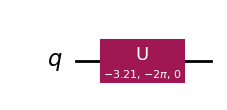

In [ ]:
'''
Simulação Clássica
'''
import numpy as np
from qiskit.circuit import Parameter
from qiskit.quantum_info import Pauli
from qiskit_aer.primitives import Estimator

estimator = Estimator() # Inicializa o estimador

# Circuitos que prepara o estado | psi(theta) >

theta = Parameter("theta")
phi = Parameter("phi")
qc = QuantumCircuit(1)
qc.u(theta,phi,0,0)

# Observável

Z = Pauli('Z')
observaveis = [Z]

# Varredura


## Inicialização

theta_0 = 0
phi_0 = 0

circuito = qc.assign_parameters({theta: theta_0, phi: phi_0})
job = estimator.run(circuits = [circuito], observables = observaveis) # manda a lista de circuitos e respectivos observáveis para rodar
expval_0 = job.result().values[0]

## Loop

theta_vals = np.linspace(-2*np.pi, 2*np.pi, 50)
phi_vals = np.linspace(-2*np.pi, 2*np.pi, 3)

for theta_val in theta_vals:
    for phi_val in phi_vals:
        circuito = qc.assign_parameters({theta: theta_val, phi: phi_val})
        job = estimator.run(circuits = [circuito], observables = observaveis) # manda a lista de circuitos e respectivos observáveis para rodar
        if job.result().values[0] < expval_0:
            expval_0 = job.result().values[0]
            theta_0 = theta_val
            phi_0 = phi_val
        else:
            pass

# Impressão do resultado e do estado fundamental

from qiskit.quantum_info import Statevector

circuito = qc.assign_parameters({theta: theta_0, phi: phi_0})
state = Statevector.from_instruction(circuito)

print(f"theta_0:{theta_0}; phi_0: {phi_0}")

print(f"Estado fundamental:")
display(state.draw('latex'))

print(f"Média do observável: {expval_0}")

circuito.draw('mpl')

## $A = I \otimes X +  X\otimes I$

In [ ]:
'''
Simulação Clássica
'''
import time
inicio = time.time() # Registro do momento do início da execução

import numpy as np
from qiskit.circuit import Parameter
from qiskit.quantum_info import Pauli, SparsePauliOp
from qiskit_aer.primitives import Estimator

estimator = Estimator() # Inicializa o estimador

# Circuitos que prepara o estado | psi(theta_0,phi_0) > | psi(theta_1,phi_1) >

theta_0 = Parameter("theta_0")
phi_0 = Parameter("phi_0")
theta_1 = Parameter("theta_1")
phi_1 = Parameter("phi_1")
qc = QuantumCircuit(2)
qc.u(theta_0,phi_0,0,0)
qc.u(theta_1,phi_1,0,1)

# Observável

A = SparsePauliOp.from_list([
    ("IX", 1),
    ("XI", 1)
])

# Print da matrix do observável
A_matrix = A.to_operator()
display(print(f"Matrix do observável:"))
display(A_matrix.draw('latex'))

## Inicialização

theta_0_fundamental = 0
phi_0_fundamental = 0
theta_1_fundamental = 0
phi_1_fundamental = 0

circuito = qc.assign_parameters({theta_0: theta_0_fundamental, phi_0: phi_0_fundamental, theta_1: theta_1_fundamental, phi_1: phi_1_fundamental})
job = estimator.run(circuits = [circuito], observables = observaveis) # manda a lista de circuitos e respectivos observáveis para rodar
expval_fundamental = job.result().values[0]

## Loop

theta_vals = np.linspace(-2*np.pi, 2*np.pi, 50)
phi_vals = np.linspace(-2*np.pi, 2*np.pi, 20)

for theta_0_val in theta_vals:
    for theta_1_val in theta_vals:
        for phi_0_val in phi_vals:
            for phi_1_val in phi_vals:
                circuito = qc.assign_parameters({theta_0: theta_0_val, phi_0: phi_0_val, theta_1 : theta_1_val, phi_1 : phi_1_val})
        job = estimator.run(circuits = [circuito], observables = observaveis) # manda a lista de circuitos e respectivos observáveis para rodar
        if job.result().values[0] < expval_fundamental:
            expval_fundamental = job.result().values[0]
            theta_0_fundamental = theta_0_val
            phi_0_fundamental = phi_0_val
            theta_1_fundamental = theta_1_val
            phi_1_fundamental = phi_1_val
        else:
            pass

# Impressão dos resultados e circuito

from qiskit.quantum_info import Statevector

circuito_final = qc.assign_parameters({theta_0: theta_0_fundamental, phi_0: phi_0_fundamental, theta_1 : theta_1_fundamental, phi_1 : phi_1_fundamental})
state = Statevector.from_instruction(circuito_final)

print(f"theta_0:{theta_0_fundamental}; phi_0: {phi_0_fundamental}; theta_1:{theta_1_fundamental}; phi_1: {phi_1_fundamental}")

print(f"Estado fundamental:")
display(state.draw('latex'))

print(f"Valor fundamental do observável (autovalor mínimo): {expval_fundamental}")

display(circuito_final.draw('mpl'))

# Impressão do tempo de execução

fim = time.time()

duracao = fim - inicio

print(f"Duração da execução do algoritmo: {duracao/60} min.")

Matrix do observável:


None

<IPython.core.display.Latex object>

ValueError: The number of qubits of the 0-th circuit (2) does not match the number of qubits of the 0-th observable (1).

# LIXO

In [ ]:
'''
Simulação Clássica
'''
import numpy as np
from qiskit.circuit import Parameter

# Circuitos que prepara o estado | psi(theta) >

theta = Parameter("theta")
phi = Parameter("phi")
qc = QuantumCircuit(1)
qc.u(theta,phi,0,0)

theta_vals = np.linspace(0, np.pi, 20)
phi_vals = np.linspace(0, np.pi, 20)

#circuitos = [qc.assign_parameters({theta : np.pi})]
circuitos = [qc.assign_parameters({theta: theta_val, phi: phi_val}) for theta_val in theta_vals for phi_val in phi_vals]

# Observável
from qiskit.quantum_info import Pauli

Z = Pauli('Z')
X = Pauli('X')

observaveis = [Z]*len(circuitos)

'''
Estimativa usando simulador clássico Aer
'''
from qiskit_aer.primitives import Estimator
estimator = Estimator() # Inicializa o estimador
job = estimator.run(circuits = circuitos, observables = observaveis) # manda a lista de circuitos e respectivos observáveis para rodar
job.result()

EstimatorResult(values=array([ 1.        ,  1.        ,  1.        ,  1.        ,  1.        ,
        1.        ,  1.        ,  1.        ,  1.        ,  1.        ,
        1.        ,  1.        ,  1.        ,  1.        ,  1.        ,
        1.        ,  1.        ,  1.        ,  1.        ,  1.        ,
        0.9921875 ,  0.98828125,  0.99023438,  0.98046875,  0.984375  ,
        0.97851562,  0.98632812,  0.9765625 ,  0.99414062,  0.99023438,
        0.98046875,  0.984375  ,  0.98242188,  0.97460938,  0.98242188,
        0.97851562,  0.9765625 ,  0.99414062,  0.98242188,  0.9765625 ,
        0.94140625,  0.9375    ,  0.94726562,  0.94335938,  0.93945312,
        0.96289062,  0.94726562,  0.95703125,  0.93554688,  0.93359375,
        0.93554688,  0.92578125,  0.93945312,  0.94335938,  0.93554688,
        0.95703125,  0.953125  ,  0.94140625,  0.93554688,  0.953125  ,
        0.84960938,  0.89648438,  0.88085938,  0.86914062,  0.890625  ,
        0.86328125,  0.87695312,  0.87109

In [ ]:
print(f"theta: {theta} ---> {job.result().values}")

theta: theta ---> [-1.]


In [ ]:
import numpy as np
from qiskit.circuit import Parameter
from qiskit_ibm_runtime import EstimatorV2

# Circuito
theta = Parameter("theta")
#phi = Parameter("phi")
circ = QuantumCircuit(1)
circ.u(theta,0,0,0) # phi = 0

# Transpilação para um circuito ISA
isa_circ = transpile(circ,backend)

# Grade de valores dos parâmetros
theta_vals = np.linspace(0, np.pi, 20)
#phi_vals = np.linspace(0, np.pi, 20)

# Observável

import qiskit.quantum_info as qi

obs = [
qi.SparsePauliOp(["Z"])
]
# Transpilação para um observável ISA
isa_obs = [
[op.apply_layout(isa_circ.layout)] for op in obs
]

# Construção do Estimator
estimator = EstimatorV2(backend)

# Grade de valores para o parâmetro theta
theta_vals = np.linspace(0, np.pi, 20)

# Construção do Pub e Execução
pub = (isa_circ, isa_obs, theta_vals)
est_job_circ = estimator.run([pub])
est_result_circ = est_job_circ.result()

# Visualização dos dados:
data = est_result_circ[0].data
evs = data.evs
stds = data.stds

RuntimeInvalidStateError: 'Unable to retrieve result for job cyghry37v8tg008xatag. Job was cancelled.'

## Exemplos

In [ ]:
import numpy as np
from qiskit.circuit import Parameter
from qiskit_ibm_runtime import EstimatorV2

# Circuito
theta = Parameter("theta")
#phi = Parameter("phi")
circ = QuantumCircuit(1)
circ.u(theta,0,0,0) # phi = 0

# Transpilação para um circuito ISA
isa_circ = transpile(circ,backend)

# Grade de valores dos parâmetros
theta_vals = np.linspace(0, np.pi, 20)
#phi_vals = np.linspace(0, np.pi, 20)

# Observável

import qiskit.quantum_info as qi

obs = [
qi.SparsePauliOp(["IZ"]),
qi.SparsePauliOp(["ZI"])
]
# Transpilação para um observável ISA
isa_obs = [
[op.apply_layout(isa_circ.layout)] for op in obs
]

# Construção do Estimator
estimator = EstimatorV2(backend)

# combinação dos parâmetros

# Construção do Pub e Execução
pub = (isa_circ, isa_obs, theta_vals)
est_job_circ = estimator.run([pub])
est_result_circ = est_job_circ.result()

# Visualização dos dados:
data = est_result_circ[0].data
evs = data.evs
stds = data.stds

In [ ]:
print(f"<Obs> = {evs} r$\pm$ {stds}")

<Obs> = [[ 0.98498498  0.98798799  0.98648649  0.99099099  0.98648649  0.98798799
   0.98948949  0.98698699  0.98498498  0.98848849  0.98698699  0.98148148
   0.98348348  0.99349349  0.99449449  0.98798799  0.98948949  0.98548549
   0.98448448  0.98148148]
 [-0.99049049 -0.96646647 -0.91491491 -0.86236236 -0.76576577 -0.65165165
  -0.54554555 -0.36136136 -0.23973974 -0.06706707  0.08108108  0.26676677
   0.40690691  0.57157157  0.68718719  0.78478478  0.87087087  0.92942943
   0.96596597  0.96896897]
 [ 0.9964965   0.97947948  0.93943944  0.85135135  0.79329329  0.67317317
   0.52252252  0.3953954   0.21571572  0.04854855 -0.10610611 -0.26576577
  -0.42792793 -0.56306306 -0.67917918 -0.8018018  -0.87337337 -0.95295295
  -0.98848849 -0.99249249]] r$\pm$ [[0.00652256 0.00647361 0.00644551 0.00605807 0.00685971 0.00647361
  0.00600981 0.00644316 0.00689593 0.00688051 0.00648192 0.00689208
  0.00688551 0.00649623 0.00641761 0.00627715 0.00686585 0.00612784
  0.00608281 0.00655681]
 [0.0066